# Keras - Image Similarity & Regrieval System

The overall goal of this project is train a set of models to determine when provided a new image (in this case a frame from one of the MCU movies), we seek to provide an output of the closest __similar images__ related to the queries image/scene. In other words, given an image and a library of images, retireve the closes K similar images to queried image. This objective is achieved by:
* leverage pre-trained models to extract features of images and index the nearest neighbor
* Retrieve similar images by calculating similarity distances between inquired image and images in the databse. 

### Import Packages

In [27]:
# data/image/graphing processing libraries
import numpy as np
import pandas as pd
from PIL import Image
import glob


import matplotlib.pyplot as plt
%matplotlib inline


#from keras.applications.resnet50 import ResNet50
from keras.applications import VGG19

## Data Processing and Augmentation

In [8]:
image_library_path = './images/image_folders/*/*.jpg'



In [20]:
def image_to_array(image_library_path):
    image_library = []
    image_map = {}
    IMAGE_SHAPE = (200,300)
    for img_path in glob.glob(image_library_path):
        im = Image.open(img_path)
        im = im.resize(IMAGE_SHAPE[::-1])
        if np.array(im).shape != (200,300, 3):
            print("Incorrect image shape: ", img_path)
        else:
            image_library.append(np.array(im))
            image_map[img_path] = np.array(im)
    
    img_array = np.array(image_library)
    return img_array, image_map

In [21]:
img_array, image_map = image_to_array(image_library_path)

Incorrect image shape:  ./images/image_folders/test/endgame_thor14.jpg
Incorrect image shape:  ./images/image_folders/test/endgame_thor2.jpg


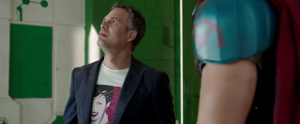

In [24]:
size = 300, 300
im = Image.open(list(image_map.items())[30][0])
im.thumbnail(size)
im

## CNN Feature Extraction

In [32]:
def image_feature_map(img_array, model):
    """
    function to convert images to a Numpy arrary stored in a list
       
    # https://keras.io/applications/#usage-examples-for-image-classification-models
    """
    
    feature_map = []
    RGB_MEAN_PIXELS = np.array([123.68,116.779,103.939]).reshape((1,1,1,3)).astype(np.float32)
    
    for img in img_array:
        x = np.expand_dims(img, axis=0)
        #x = preprocess_input(x)
        features = model.predict(np.flip(x-RGB_MEAN_PIXELS,axis = -1))
        
        #features = features.flatten()
        feature_map.append(features)
    
    return feature_map

In [30]:
# create the base pre-trained model
vgg_model = VGG19(weights='imagenet', include_top=False,pooling="avg")

In [33]:
feature_map = image_feature_map(img_array, vgg_model)

In [ ]:
## Exporting (pickling) features
pickle.dump(feature_map, open("./model_config/vgg19_similarity_101619.p", "wb"))

In [ ]:
## loading features (unpickling)
embedding = pickle.load(open("../model_config/vgg19_similarity_101519.p",'rb'))